<a href="https://colab.research.google.com/github/BeginRahul/Cartoon-Image-/blob/main/cartoon_effect_using_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARTOON EFFECT USING OPENCV
:

In [187]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#load image


In [188]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

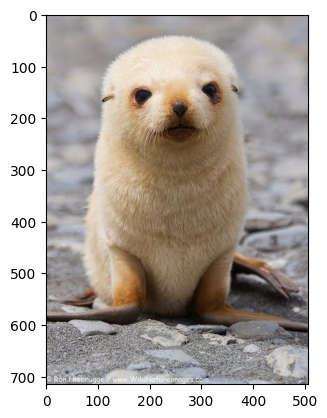

array([[[165, 163, 168],
        [165, 163, 168],
        [165, 163, 168],
        ...,
        [159, 159, 167],
        [159, 159, 167],
        [159, 159, 167]],

       [[164, 162, 167],
        [164, 162, 167],
        [165, 163, 168],
        ...,
        [159, 159, 167],
        [159, 159, 167],
        [159, 159, 167]],

       [[164, 162, 167],
        [164, 162, 167],
        [164, 162, 167],
        ...,
        [160, 160, 168],
        [160, 160, 168],
        [160, 160, 168]],

       ...,

       [[156, 154, 159],
        [153, 151, 156],
        [145, 143, 148],
        ...,
        [137, 135, 136],
        [107, 105, 106],
        [ 80,  78,  79]],

       [[152, 150, 155],
        [155, 153, 158],
        [151, 149, 154],
        ...,
        [145, 143, 144],
        [154, 152, 153],
        [138, 136, 137]],

       [[149, 147, 152],
        [157, 155, 160],
        [157, 155, 160],
        ...,
        [157, 155, 156],
        [134, 133, 131],
        [133, 132, 130]]], dtype=uint8)
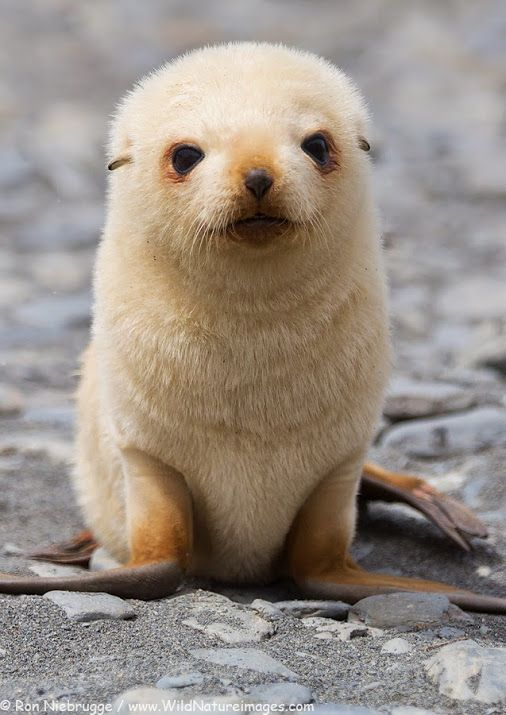

In [189]:
filename='dog.jpg'
read_file(filename)# this array bcoz we are only read the file

In [190]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)#Displays the image using Matplotlib's imshow function.
  plt.axis('off')#by using this if can turn off the axis which is showing
  plt.show()
  return img#Returns the image data as a NumPy array.

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Converts the color space of the image from BGR (Blue, Green, Red) to RGB (Red, Green, Blue) using OpenCV's cvtColor function. This is necessary because OpenCV reads images in BGR format by default, but Matplotlib displays images in RGB format.

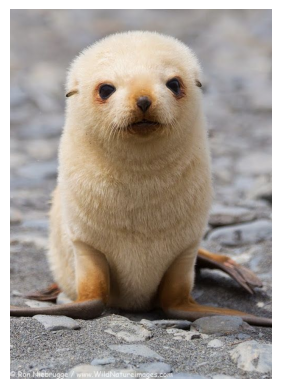

In [191]:
filename='dog.jpg'
img = read_file(filename)

org_img = np.copy(img)

# create edge *mask*:-
This is a Python function named edge_mask that takes an image and two parameters, and returns a binary image (edge mask) highlighting the edges in the input image.

#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY):-
Converts the input image img from RGB (Red, Green, Blue) color space to grayscale using OpenCV's cvtColor function. This reduces the dimensionality of the image and makes it easier to detect edges.

#gray_blur = cv2.medianBlur(gray, blur_value):-
Applies a median blur to the grayscale image gray using OpenCV's medianBlur function with a kernel size of blur_value. This helps reduce noise and smooth out the image.

In [192]:
def edge_mask(img, line_size, blur_value):
  gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
          cv2.THRESH_BINARY, line_size, blur_value)
  return edges

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
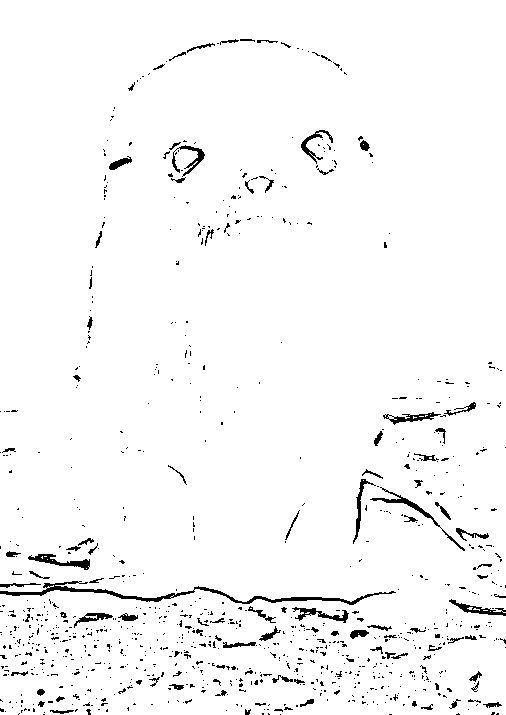

In [193]:
line_size, blur_value = 7,7
edge_mask(img, line_size, blur_value)
#we didn't plot that why it showing the array

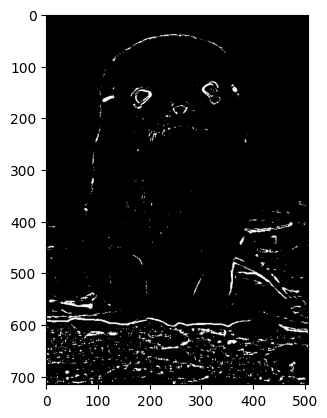

In [194]:
line_size, blur_value = 7,7
#line_size is the size of the neighborhood used to calculate the threshold value.
#blur_value is the blur value used to smooth out the image before thresholding.
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="binary")
#cmap This sets the colormap to binary (black and white), which is suitable for displaying edge maps.
plt.show()

#reducing the color palete:- reducing the different color of image into 2 or 3 color(wgite , black)

In [195]:
def color_quantization(mg , k):
  #tranform the image
  #Converts the image (img) to a floating-point array (np.float32) to ensure accurate calculations.
  data = np.float32(img).reshape((-1,3))

  #determine the stoping criteria of kmean algorithm
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-means
  ret, label, center = cv2.kmeans(data, k , None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  #k: the desired number of color clusters.
  #None: no initial cluster centers are provided.
  #criteria: the stopping criteria defined earlier.
  #10: the number of attempts to find the best cluster centers.
  #cv2.KMEANS_RANDOM_CENTERS: initializes cluster centers randomly.

  center = np.uint8(center)#Converts the cluster centers (center) to unsigned 8-bit integers,

  result= center[label.flatten()]
  result= result.reshape(img.shape)

  return result


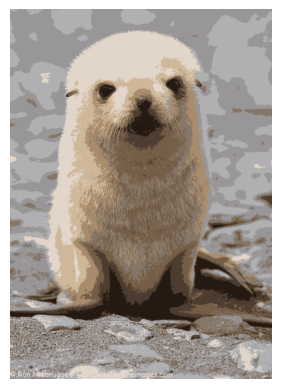

In [196]:
img = color_quantization(img , k=9)

plt.imshow(img)
plt.axis("off")
plt.show()

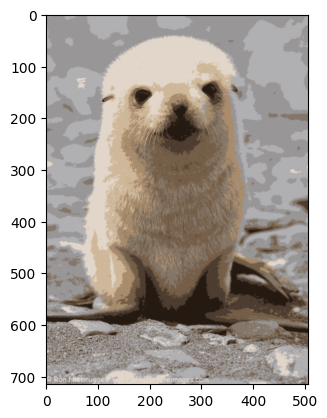

In [197]:
#reduce the noise
#d=100: The diameter of the filter. A larger value means a larger filter, which can lead to more blur.
#sigmaColor=200: The color tolerance (range: 0-255). A larger value means more color variation is allowed, resulting in more blur.
#sigmaSpace=200: The spatial tolerance (range: 0-255). A larger value means more spatial variation is allowed, resulting in more blur.
blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

#combine edge mask with the quantiz img

In [198]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(c)
    axs[0].set_title("Cartoon Image")
    axs[0].axis("off")

    axs[1].imshow(org_img)
    axs[1].set_title("Original Image")
    axs[1].axis("off")

    plt.subplots_adjust(wspace=0.05)
    plt.show()

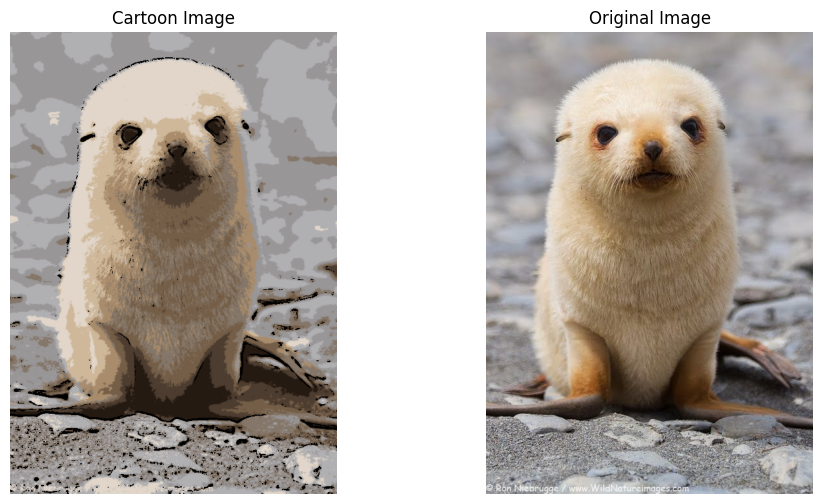

In [199]:
cartoon()